# 实现ResNet18

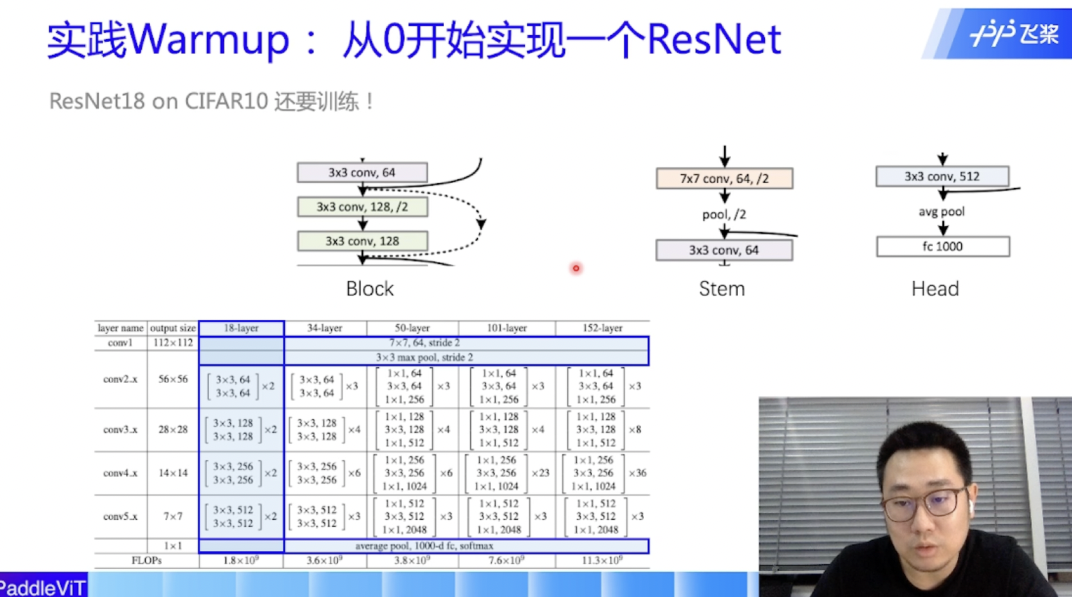

In [15]:
import paddle
import paddle.nn as nn

In [35]:
class Identity(nn.Layer):
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        return x

In [36]:
class Block(nn.Layer):
    def __init__(self, in_dim, out_dim, stride):
        super().__init__()
        self.conv1 = nn.Conv2D(in_dim,out_dim,3,stride=stride,padding=1,bias_attr = False)
        self.bn1 = nn.BatchNorm2D(out_dim)
        self.conv2 = nn.Conv2D(out_dim,out_dim,3,stride=1,padding=1,bias_attr = False)
        self.bn2 = nn.BatchNorm2D(out_dim)
        self.relu = nn.ReLU()
        
        if stride == 2 or in_dim != out_dim:
            self.downsample = nn.Sequential(*[
                nn.Conv2D(in_dim,out_dim,1,stride = stride),
                nn.BatchNorm2D(out_dim)
            ])
        else:
            self.downsample = Identity()
    
    def forward(self,x):
        h = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        identity = self.downsample(h)
        x = x + identity
        x = self.relu(x)
        return x

In [54]:
class ResNet(nn.Layer):
    def __init__(self, in_dim=64,num_classes=10):
        super().__init__()
        self.in_dim = in_dim
        #stem layers
        self.conv1 = nn.Conv2D(in_channels = 3,
                              out_channels = in_dim,
                              kernel_size=3,
                              stride=1,
                              padding=1,
                              bias_attr=False)
        self.bn1 = nn.BatchNorm2D(in_dim)
        self.relu = nn.ReLU()
        #blocks
        self.layers1 = self._make_layer(dim=64,n_blocks=2,stride=1)
        self.layers2 = self._make_layer(dim=128,n_blocks=2,stride=2)
        self.layers3 = self._make_layer(dim=256,n_blocks=2,stride=2)
        self.layers4 = self._make_layer(dim=512,n_blocks=2,stride=2)
        #head layer
        self.avgpool = nn.AdaptiveAvgPool2D(1) #根据输出决定pooling大小
        self.classifier = nn.Linear(512,num_classes)
        
        
    def _make_layer(self,dim,n_blocks,stride):
        layer_list = []
        layer_list.append(Block(self.in_dim,dim,stride=stride))
        self.in_dim = dim
        for i in range(1,n_blocks):
            layer_list.append(Block(self.in_dim,dim,stride=1))
        return nn.Sequential(*layer_list)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layers1(x)
        x = self.layers2(x)
        x = self.layers3(x)
        x = self.layers4(x)
        x = self.avgpool(x)
        x = x.flatten(1)
        x = self.classifier(x)
        return x

In [55]:
def main():
    t = paddle.randn([4,3,32,32])
    model = ResNet()
    print(model)
    out = model(t)
    print(out.shape)


In [56]:
if __name__ == "__mai__":
    main()

In [57]:
main()

ResNet(
  (conv1): Conv2D(3, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
  (relu): ReLU()
  (layers1): Sequential(
    (0): Block(
      (conv1): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
      (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (conv2): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
      (bn2): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (relu): ReLU()
      (downsample): Identity()
    )
    (1): Block(
      (conv1): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
      (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (conv2): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
      (bn2): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (relu): ReLU()
      (downsample): Identity()
    )
  )
  (layers2): Sequential(
    (0): Block(
      (conv1): C